## BCycle Starter Code

In the following notebook, we have provided several examples of types of exploratory analysis we would do on these datasets. They are by no means exhaustive, but it should provide with code to do similar/further work!

## Getting the data from Blob Storage
Our data is stored inside of Azure Blob Storage. Following is the code to get it to your notebook.

In [ ]:
# If you are running this code on your own computer, uncomment the following line.
!pip install azure

In [ ]:
from azure.storage.blob import BlockBlobService
import os

In [ ]:
# You should only run this code once.
!mkdir bcycle

In [ ]:
local_path=os.getcwd() + "/bcycle" # Where the data will be stored.
blob_account_name = "mldsdatahack2019diag" # Don't edit!
blob_account_key = "JsauBssnY92CeD3MgI2SWhkQ16JioJCRWVW8NzKtcWckI+DaNNbCmpmMAVq27GD91mhgH+oHPx+QbIKUCow5gA=="  # Don't edit!

mycontainer = "datahackdata2019"       # Don't edit!

In [ ]:
import azure
from azure.storage.blob import BlockBlobService

# Create a client to get data
blob_service = BlockBlobService(account_name=blob_account_name, account_key=blob_account_key)
# Get the data
blob_service.get_blob_to_path("datahackdata2019", "BCycleAustin.csv", os.path.join(local_path, "BCycleAustin.csv"))

## Load Data

In [2]:
# Yo should see BCycleAustin.csv

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Read in data
df = pd.read_csv('BCycleAustin.csv')

In [8]:
# See the first few rows.
df.head()

Trip ID                 Membership Type  Bicycle ID  Checkout Kiosk ID  \
0  9900285854    Annual (San Antonio B-cycle)       207.0             2537.0   
1  9900288020  24-Hour Kiosk (Austin B-cycle)       190.0             2537.0   
2  9900289011                        Local365       190.0             2537.0   
3  9900292552                         Walk Up       354.0             2537.0   
4  9900293709                        Local365        20.0             2537.0   

   Checkout Kiosk  Return Kiosk ID          Return Kiosk  \
0  West & 6th St.           2707.0  Rainey St @ Cummings   
1  West & 6th St.           2707.0  Rainey St @ Cummings   
2  West & 6th St.           2707.0  Rainey St @ Cummings   
3  West & 6th St.           2707.0  Rainey St @ Cummings   
4  West & 6th St.           2707.0  Rainey St @ Cummings   

   Trip Duration Minutes    Checkout DateTime  Checkout Latitude  \
0                     76  2014-10-26 13:12:00           30.27041   
1                     12  2014-10-30 19:12:00           30.27041   
2                      9  2015-10-01 19:12:27           30.27041   
3                     14  2015-10-04 13:12:41           30.27041   
4                     11  2015-10-04 13:12:56           30.27041   

   Checkout Longitude  Return Latitude  Return Longitude  
0           -97.75046         30.25579         -97.73982  
1           -97.75046         30.25579         -97.73982  
2           -97.75046         30.25579         -97.73982  
3           -97.75046         30.25579         -97.73982  
4           -97.75046         30.25579         -97.73982

## Example 1: BCycle Usage over Time

In [9]:
# Convert the checkout datetime from string to an actual date-time object.
df['Checkout DateTime'] = pd.to_datetime(df['Checkout DateTime'])

In [10]:
# extract year-month to bin for plot
df['Checkout YR-MO'] = pd.to_datetime(df['Checkout DateTime'].apply(lambda x :
                                                      str(x.year) + '-' + str(x.month)))

In [11]:
# All the cycles checked out in the same month are in the same group
groups = df.groupby(['Checkout YR-MO']).count()

In [12]:
# See first few columns
groups.head()

Trip ID  Membership Type  Bicycle ID  Checkout Kiosk ID  \
Checkout YR-MO                                                            
2013-12-01         1457             1457        1457               1457   
2014-01-01         3358             3358        3358               3358   
2014-02-01         5297             5297        5297               5297   
2014-03-01        23547            23547       23547              23547   
2014-04-01        12624            12624       12624              12624   

                Checkout Kiosk  Return Kiosk ID  Return Kiosk  \
Checkout YR-MO                                                  
2013-12-01                1457             1457          1457   
2014-01-01                3358             3358          3358   
2014-02-01                5297             5297          5297   
2014-03-01               23547            23547         23547   
2014-04-01               12624            12624         12624   

                Trip Duration Minutes  Checkout DateTime  Checkout Latitude  \
Checkout YR-MO                                                                
2013-12-01                       1457               1457               1457   
2014-01-01                       3358               3358               3358   
2014-02-01                       5297               5297               5297   
2014-03-01                      23547              23547              23547   
2014-04-01                      12624              12624              12624   

                Checkout Longitude  Return Latitude  Return Longitude  
Checkout YR-MO                                                         
2013-12-01                    1457             1457              1457  
2014-01-01                    3358             3358              3358  
2014-02-01                    5297             5297              5297  
2014-03-01                   23547            23547             23547  
2014-04-01                   12624            12624             12624

In [13]:
groups = groups['Trip ID']
groups.head()

Checkout YR-MO
2013-12-01     1457
2014-01-01     3358
2014-02-01     5297
2014-03-01    23547
2014-04-01    12624
Name: Trip ID, dtype: int64

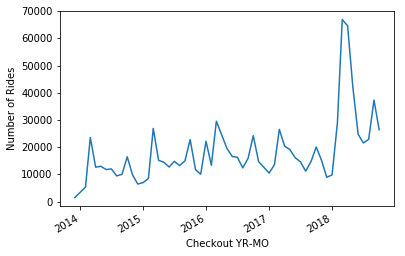

In [14]:
# Number of rides per month
groups.plot()
plt.ylabel('Number of Rides')
plt.show()

### Follow Up

From this plot, we can see a large spike in 2018, what factors could have led to this? (e.g. opening up to UT). 

A natural follow-up question then, is how does the individual Kiosk activity change? (left open if interested)

## Example 2: Mapping Kiosks

Resource for the following: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [15]:
# Installing folium for nice map visualizations
!pip install folium

In [16]:
import folium

In [17]:
# first extract the kiosk locations
df_kiosks = df[['Checkout Kiosk','Checkout Latitude','Checkout Longitude']].drop_duplicates()
df_kiosks.reset_index(drop=True, inplace=True)
df_kiosks.head()

Checkout Kiosk  Checkout Latitude  \
0                           West & 6th St.           30.27041   
1  Convention Center / 4th St. @ MetroRail           30.26483   
2                           8th & Congress           30.26980   
3               East 11th St. & San Marcos           30.26968   
4               South Congress & Elizabeth           30.24891   

   Checkout Longitude  
0           -97.75046  
1           -97.73900  
2           -97.74186  
3           -97.73074  
4           -97.75019

In [18]:
# Creating a map of all kiosks
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
)

for i in range(len(df_kiosks)):
    folium.Marker([df_kiosks['Checkout Latitude'][i],df_kiosks['Checkout Longitude'][i]], 
                   tooltip = df_kiosks['Checkout Kiosk'][i]).add_to(m)
m

### Follow Up

Related to the previous example, you could now adjust the size of the markers based on volume of trips...

## Example 3: Mapping Trajectories over a Single Month

Resource: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

In [19]:
# Get all trajectories for checkout year/month 2014 october
df_mo = df[df['Checkout YR-MO'] == '2014-10-01']
df_mo.reset_index(inplace=True)
df_mo.head()

index     Trip ID                     Membership Type  Bicycle ID  \
0      0  9900285854        Annual (San Antonio B-cycle)       207.0   
1      1  9900288020      24-Hour Kiosk (Austin B-cycle)       190.0   
2    253  9900267860  Annual Membership (Austin B-cycle)       772.0   
3    254  9900267861  Annual Membership (Austin B-cycle)       470.0   
4    255  9900271774      24-Hour Kiosk (Austin B-cycle)       961.0   

   Checkout Kiosk ID  Checkout Kiosk  Return Kiosk ID          Return Kiosk  \
0             2537.0  West & 6th St.           2707.0  Rainey St @ Cummings   
1             2537.0  West & 6th St.           2707.0  Rainey St @ Cummings   
2             2537.0  West & 6th St.           2707.0  Rainey St @ Cummings   
3             2537.0  West & 6th St.           2707.0  Rainey St @ Cummings   
4             2537.0  West & 6th St.           2707.0  Rainey St @ Cummings   

   Trip Duration Minutes   Checkout DateTime  Checkout Latitude  \
0                     76 2014-10-26 13:12:00           30.27041   
1                     12 2014-10-30 19:12:00           30.27041   
2                     15 2014-10-04 10:12:00           30.27041   
3                     15 2014-10-04 10:12:00           30.27041   
4                     54 2014-10-06 21:12:00           30.27041   

   Checkout Longitude  Return Latitude  Return Longitude Checkout YR-MO  
0           -97.75046         30.25579         -97.73982     2014-10-01  
1           -97.75046         30.25579         -97.73982     2014-10-01  
2           -97.75046         30.25579         -97.73982     2014-10-01  
3           -97.75046         30.25579         -97.73982     2014-10-01  
4           -97.75046         30.25579         -97.73982     2014-10-01

In [20]:
!pip install geopy

  Running setup.py bdist_wheel for geographiclib: started
  Running setup.py bdist_wheel for geographiclib: finished with status 'done'
  Stored in directory: C:\Users\Zilli\AppData\Local\pip\Cache\wheels\99\45\d1\14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib


In [21]:
# For checkout at a particular kiosk, how many trips to other kiosk?
from geopy.distance import vincenty
df_mo['dist'] = df_mo.apply(lambda row: vincenty([row['Checkout Latitude'], row['Checkout Longitude']], [row['Return Latitude'], row['Return Longitude']]).km, axis=1)
df_mo['speed'] = df_mo.apply(lambda row: row['dist']/(row['Trip Duration Minutes']/60) if row['Trip Duration Minutes']!=0 else 0, axis=1)
trips_grouped = df_mo.groupby(['Checkout Latitude', 'Checkout Longitude', 'Return Latitude', 'Return Longitude'])
df_counts = trips_grouped.count()['Trip ID']
df_times = trips_grouped.mean()['Trip Duration Minutes']
df_dist = trips_grouped.mean()['dist']
df_speed = trips_grouped.mean()['speed']

#     geopy.distance.vincenty(coor1, coor2).km/ (5/3600)
# print("Example:",df_counts[30.24891,-97.75019,30.24891,-97.75019])
# print("Max:",df_counts.max())
df_dist.head()

C:\Users\Zilli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zilli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Zilli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

Checkout Latitude  Checkout Longitude  Return Latitude  Return Longitude
30.24891           -97.75019           30.24891         -97.75019           0.000000
                                       30.25103         -97.74926           0.251484
                                       30.25226         -97.74854           0.403898
                                       30.25579         -97.73982           1.256085
                                       30.25870         -97.74872           1.094469
Name: dist, dtype: float64

In [22]:
# for i in range(len(df_counts)):
#     print(df_counts.index[i])

In [23]:
for i in range(len(df_counts)):
    checkout_lat, checkout_lon, return_lat, return_lon = df_counts.index[i]


In [24]:
df_kiosks['Checkout Latitude'].min(), df_kiosks['Checkout Latitude'].max()

(30.24258, 30.294390000000003)

In [25]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
m

### Follow Up:

Now do you think the trajectories change over time?

In [26]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="blue", weight=2.5, opacity=df_times[i]/df_times.max()).add_to(m)
m

In [27]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_speed.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="green", weight=2.5, opacity=df_speed[i]/df_speed.max()).add_to(m)
m

In [30]:
bus_stops = pd.read_csv('stops.txt')
bus_stops.head()

stop_id  stop_code               stop_name                  stop_desc  \
0      243        243         RIO GRANDE/15TH   000606 15Th & Rio Grande   
1      466        466   8740 Lamar/Payton Gin  008740 LAMAR & PAYTON GIN   
2      467        467  FAIRFIELD STATION (SB)   008630 Lamar & Fairfield   
3      468        468          Lamar/Thurmond    008400 LAMAR & THURMOND   
4      469        469   8320 Lamar/Meadowlark  008320 LAMAR & MEADOWLARK   

    stop_lat   stop_lon  zone_id  \
0  30.278966 -97.746339      NaN   
1  30.356809 -97.701066      NaN   
2  30.355296 -97.703128      NaN   
3  30.353139 -97.706082      NaN   
4  30.352256 -97.707295      NaN   

                                            stop_url  location_type  \
0  https://www.capmetro.org/stopdetail/index.php?...            NaN   
1  https://www.capmetro.org/stopdetail/index.php?...            NaN   
2  https://www.capmetro.org/stopdetail/index.php?...            NaN   
3  https://www.capmetro.org/stopdetail/index.php?...            NaN   
4  https://www.capmetro.org/stopdetail/index.php?...            NaN   

   parent_station  stop_timezone  wheelchair_boarding corner_placement  \
0             NaN            NaN                    0        Northwest   
1             NaN            NaN                    0        Southwest   
2             NaN            NaN                    0        Southwest   
3             NaN            NaN                    0        Southwest   
4             NaN            NaN                    0        Northwest   

  stop_position on_street   at_street  heading  
0       Farside      15Th  Rio Grande      287  
1     Mid-Block     LAMAR  PAYTON GIN      226  
2       Farside     Lamar   Fairfield      230  
3       Farside     LAMAR    THURMOND      230  
4      Nearside     LAMAR  MEADOWLARK      229

In [31]:
dockless_trips = pd.read_csv('Dockless_Vehicle_Trips.csv')
dockless_trips.head()

ID                             Device ID  \
0  000000cb-78a9-4b95-8ead-37c797abcf37  ad14e63b-940d-4ca3-84c6-0131147fba45   
1  00001b5f-46aa-4b26-a12f-d7b4d3c69834  c5a230c9-7e80-4464-862f-f2b23f61d6d3   
2  00002334-2f2b-41a0-9a04-8ff66be39f40  5a9f7815-bf0c-4fef-8bac-60efd4f23b10   
3  0000261e-c0f0-4fb1-9947-1606dfe4ddcf  41fa0cf0-f433-4b3a-89f5-2c6cec6c367d   
4  00002c70-678b-4c09-a32c-da0266e329c6  ddd4bbc3-114e-4cbc-b078-860e3c28b11b   

  Vehicle Type  Trip Duration  Trip Distance              Start Time  \
0      scooter          358.0          915.0  06/29/2018 05:30:00 PM   
1      scooter          226.0          839.0  11/30/2018 11:00:00 AM   
2      scooter          324.0         1206.0  10/02/2018 03:15:00 PM   
3      scooter         1096.0            0.0  09/02/2018 04:45:00 PM   
4      scooter          408.0         1144.0  09/28/2018 11:45:00 AM   

                 End Time           Modified Date  Month  Hour  Day of Week  \
0  06/29/2018 05:30:00 PM  12/12/2018 09:36:14 PM    6.0  17.0          5.0   
1  11/30/2018 11:00:00 AM  12/13/2018 03:43:44 PM   11.0  11.0          5.0   
2  10/02/2018 03:30:00 PM  12/13/2018 03:49:54 PM   10.0  15.0          2.0   
3  09/02/2018 05:00:00 PM  12/13/2018 03:53:09 PM    9.0  16.0          0.0   
4  09/28/2018 11:45:00 AM  12/12/2018 10:24:56 PM    9.0  11.0          5.0   

   Council District (Start)  Council District (End)    Year  
0                       5.0                     9.0  2018.0  
1                       9.0                     9.0  2018.0  
2                       9.0                     9.0  2018.0  
3                       9.0                     9.0  2018.0  
4                       3.0                     3.0  2018.0

In [35]:
district_to_coord = {1.0: (30.285867, -97.666331),
2.0: (30.207107, -97.716137),
3.0: (30.233695, -97.723497),
4.0: (30.362899, -97.696938),
5.0: (30.202495, -97.806754),
6.0: (30.448826, -97.789373),
7.0: (30.420820, -97.705198),
8.0: (30.232834, -97.864304),
9.0: (30.287799, -97.741523),
10.0: (30.377307, -97.797838)}
dockless_trips['start coord estimate'] = dockless_trips['Council District (Start)'].map(district_to_coord)
dockless_trips['end coord estimate'] = dockless_trips['Council District (End)'].map(district_to_coord)
dockless_trips.head()

ID                             Device ID  \
0  000000cb-78a9-4b95-8ead-37c797abcf37  ad14e63b-940d-4ca3-84c6-0131147fba45   
1  00001b5f-46aa-4b26-a12f-d7b4d3c69834  c5a230c9-7e80-4464-862f-f2b23f61d6d3   
2  00002334-2f2b-41a0-9a04-8ff66be39f40  5a9f7815-bf0c-4fef-8bac-60efd4f23b10   
3  0000261e-c0f0-4fb1-9947-1606dfe4ddcf  41fa0cf0-f433-4b3a-89f5-2c6cec6c367d   
4  00002c70-678b-4c09-a32c-da0266e329c6  ddd4bbc3-114e-4cbc-b078-860e3c28b11b   

  Vehicle Type  Trip Duration  Trip Distance              Start Time  \
0      scooter          358.0          915.0  06/29/2018 05:30:00 PM   
1      scooter          226.0          839.0  11/30/2018 11:00:00 AM   
2      scooter          324.0         1206.0  10/02/2018 03:15:00 PM   
3      scooter         1096.0            0.0  09/02/2018 04:45:00 PM   
4      scooter          408.0         1144.0  09/28/2018 11:45:00 AM   

                 End Time           Modified Date  Month  Hour  Day of Week  \
0  06/29/2018 05:30:00 PM  12/12/2018 09:36:14 PM    6.0  17.0          5.0   
1  11/30/2018 11:00:00 AM  12/13/2018 03:43:44 PM   11.0  11.0          5.0   
2  10/02/2018 03:30:00 PM  12/13/2018 03:49:54 PM   10.0  15.0          2.0   
3  09/02/2018 05:00:00 PM  12/13/2018 03:53:09 PM    9.0  16.0          0.0   
4  09/28/2018 11:45:00 AM  12/12/2018 10:24:56 PM    9.0  11.0          5.0   

   Council District (Start)  Council District (End)    Year  \
0                       5.0                     9.0  2018.0   
1                       9.0                     9.0  2018.0   
2                       9.0                     9.0  2018.0   
3                       9.0                     9.0  2018.0   
4                       3.0                     3.0  2018.0   

      start coord estimate       end coord estimate  
0  (30.202495, -97.806754)  (30.287799, -97.741523)  
1  (30.287799, -97.741523)  (30.287799, -97.741523)  
2  (30.287799, -97.741523)  (30.287799, -97.741523)  
3  (30.287799, -97.741523)  (30.287799, -97.741523)  
4  (30.233695, -97.723497)  (30.233695, -97.723497)

In [87]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

dockless_grouped = dockless_trips.groupby(['start coord estimate', 'end coord estimate'])
dockless_counts = dockless_grouped.count()['ID']

dockless_counts.head()

for i in range(len(dockless_counts)):
    a=dockless_counts.index[i][0][0]
    b=dockless_counts.index[i][0][1]
    c=dockless_counts.index[i][1][0]
    d=dockless_counts.index[i][1][1]
    
#     start_lat = a
#     start_lon = b
#     end_lat = c
#     end_long = d
    folium.PolyLine([(a, b),
                    (c,d)], color="blue", weight=5, opacity=(dockless_counts[i])*50/dockless_counts.max()).add_to(m)
for i in range(len(df_counts)):
    start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
    folium.PolyLine([(start_lat, start_lon),
                    (end_lat,end_lon)], color="red", weight=2.5, opacity=df_counts[i]/df_counts.max()).add_to(m)
for i in range(0, len(bus_stops), 2):
#     start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
#     print(bus_stops.iloc[i])
    x = bus_stops.iloc[i]['stop_lat']
    y = bus_stops.iloc[i]['stop_lon']
    folium.CircleMarker((x, y), radius=2, color='green').add_to(m)
m

In [86]:
m = folium.Map(
    location=[df_kiosks['Checkout Latitude'].mean(),df_kiosks['Checkout Longitude'].mean()],
    zoom_start=14,
    tiles='Stamen Terrain'
)

for i in range(len(bus_stops)):
#     start_lat, start_lon, end_lat, end_lon = df_counts.index[i]
#     print(bus_stops.iloc[i])
    x = bus_stops.iloc[i]['stop_lat']
    y = bus_stops.iloc[i]['stop_lon']
    folium.CircleMarker((x, y), radius=3).add_to(m)
m

# 

In [82]:
1+1

2